<a href="https://colab.research.google.com/github/dhiruvivek/Book-Recommendation/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**    - 



##### **Project Type**    - Unsupervised Machine Learning Capstone Project 
##### **Contribution**    - Individual
##### **Name -** Vivek Tripathi


# **GitHub Link -**

https://github.com/dhiruvivek/Book-Recommendation

# **Project Summary -**
A book recommendation system is a system that suggests books to users based on their interests and preferences. These systems are commonly used by online bookstores, libraries, and reading apps to help users discover new books and authors. There are several approaches to building a book recommendation system. One common approach is to use collaborative filtering, which involves analyzing the reading patterns and preferences of a group of users and making recommendations based on what similar users have enjoyed. Another approach is to use content-based filtering, which involves analyzing the characteristics of a book (such as its genre, author, and subject matter) and making recommendations based on how closely they match the user's interests.

In this project, building a book recommendation system using one or more of these approaches.need to gather a dataset of books and user ratings, and then use machine learning algorithms to build a model that can make recommendations. You may also need to design a user interface for your system, so that users can easily interact with it and receive recommendations. Overall, this project will involve a combination of data gathering, data analysis, and development skills, and will give the opportunity to apply knowledge of machine learning and recommendation systems in a practical context.

# **Objective**


A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc.

## **Understanding the Business Problem**

Businesses may have the following expectations from a book recommendation system:

**Increased sales**: One of the main goals of a book recommendation system is to increase sales by suggesting books that users are likely to purchase. This can be achieved by making personalized recommendations that match the user's interests and preferences.

**Customer satisfaction**: A good recommendation system should be able to provide users with a satisfying and enjoyable experience. This can be achieved by making relevant and accurate recommendations and by providing a user-friendly interface.

**User engagement**: A recommendation system can help to keep users engaged with a business's platform by providing a continuous stream of recommendations and new content. This can lead to increased customer loyalty and a longer user lifespan.

**Improved user experience**: A recommendation system can help businesses to improve the overall user experience by making it easier for users to discover new books and authors that they may enjoy.

**Competitive advantage**: A well-designed recommendation system can provide businesses with a competitive advantage over their rivals, as it can help to attract and retain customers.

Data-driven decision making: A recommendation system can provide businesses with insights into user preferences and reading habits, which can be used to inform marketing and content strategy decisions.

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books=pd.read_csv("/content/drive/MyDrive/Book Recommendation SYstem/Books.csv")
users=pd.read_csv("/content/drive/MyDrive/Book Recommendation SYstem/Users.csv")
ratings=pd.read_csv("/content/drive/MyDrive/Book Recommendation SYstem/Ratings.csv")

# **EDA**

In [ ]:
# ratings count


ratings_explicit= dataset[dataset['ratings'] != 0]
ratings_implicit= dataset[dataset['ratings'] == 0]

### **Explicit+Implicit Ratings**

In [ ]:
# lets create rating_count variable
rating_count=ratings['ratings'].value_counts().reset_index().sort_values('ratings',ascending=False)

Text(0.5, 1.0, 'Ratings Count')

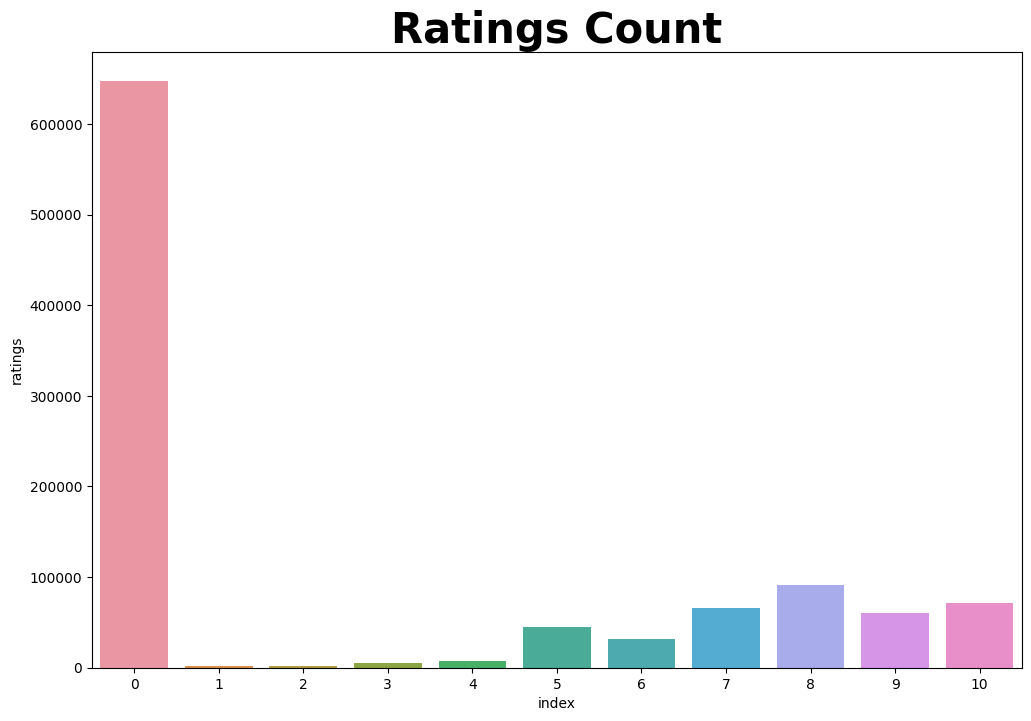

In [ ]:
# lets plot bar graph for it
plt.figure(figsize=(12,8))
ax=sns.barplot(x=rating_count['index'], y=rating_count['ratings'])
ax.set_title('Ratings Count',fontsize=30,fontweight='bold')

Conclusion: The datset with both explicit and implicit ratings is highly skewed toward the value of zero.

## **Explicit Ratings**

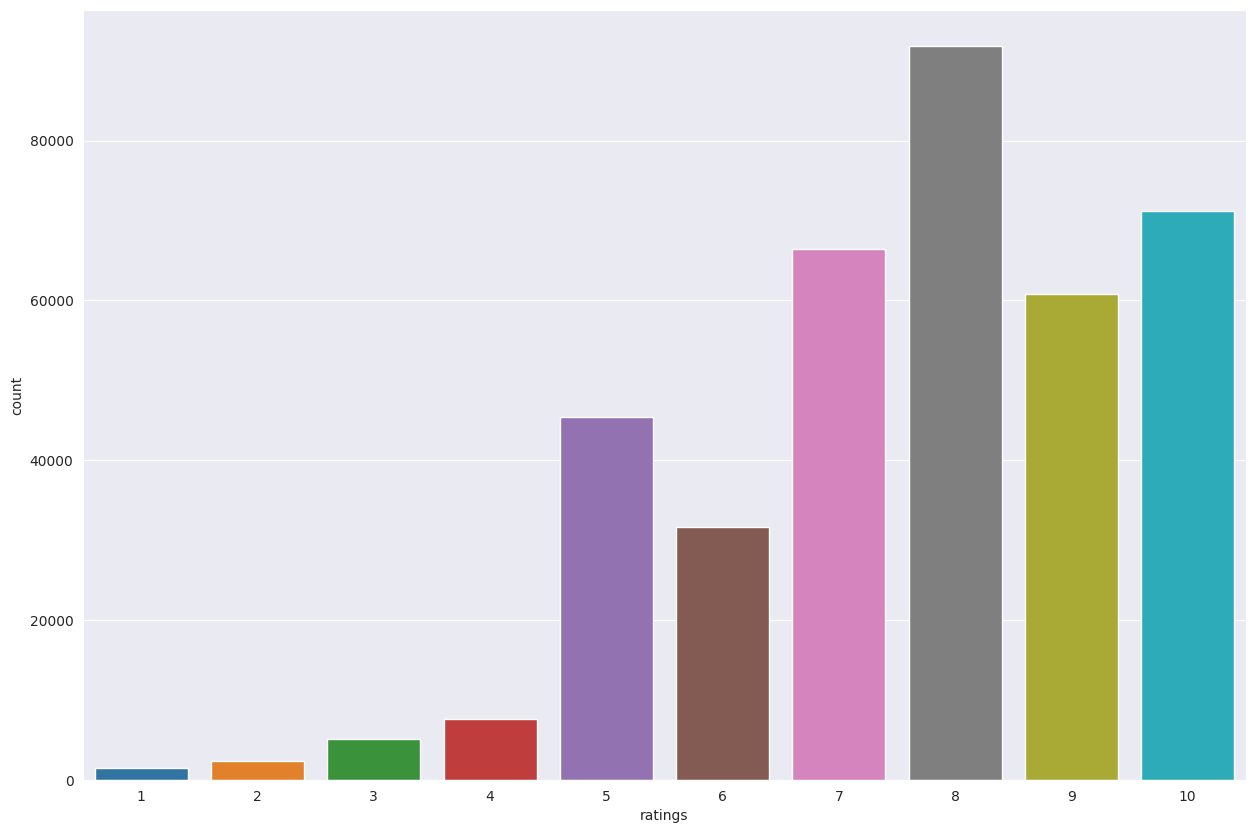

In [ ]:
# Lets plot graph for it
fig = plt.figure(figsize =(15,10))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='ratings') 
ax.set_title('Ratings-Density Plot', weight='bold').set_fontsize('25')
plt.show()

Conclusion: The skewness perishes after we remove the implicit ratings.

In [ ]:
#Book ratings count using group by
book_rating=dataset.groupby(['Book-Title'])['ratings'].count().sort_values(ascending=False).reset_index()

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

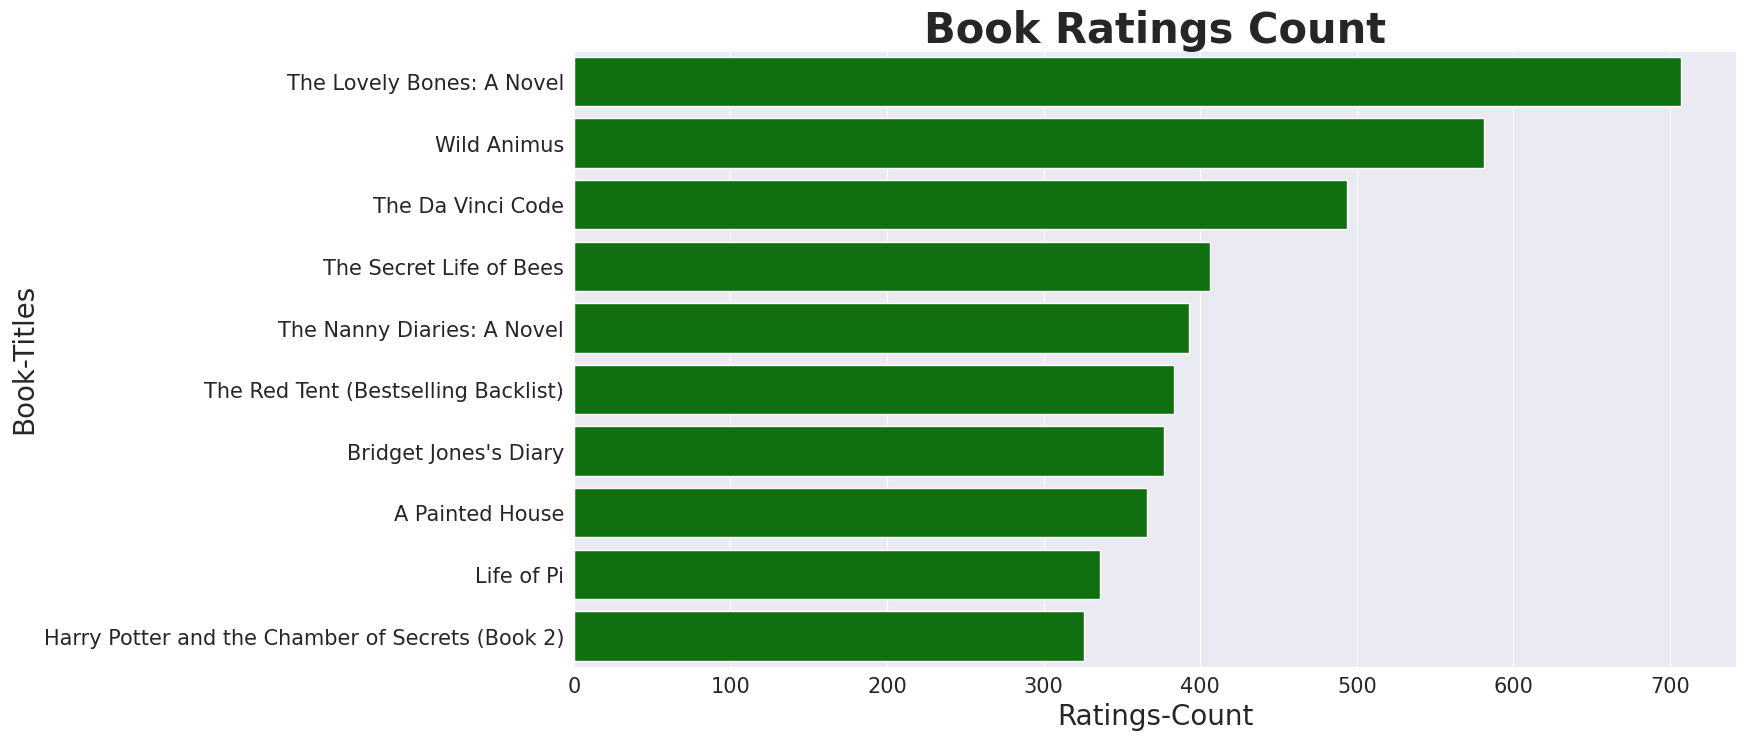

In [ ]:
# lets plot the graph for it
plt.figure(figsize=(15,8))
ax=sns.barplot(x=book_rating['ratings'][:10], y=book_rating['Book-Title'][:10],color='g')
ax.set_title('Book Ratings Count', fontsize=30,fontweight='bold')
ax.set_xlabel('Ratings-Count',fontsize=20)
ax.set_ylabel('Book-Titles',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

Here, we are able to observe, most frequently rated books by the users.

## **Location**

In [ ]:
#Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(users.Country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

#Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

#Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

In [ ]:
#Every country has now just one occurance
df_location.countries.value_counts()

australia         1
canada            1
france            1
germany           1
italy             1
netherlands       1
new zealand       1
other             1
portugal          1
spain             1
united kingdom    1
usa               1
Name: countries, dtype: int64

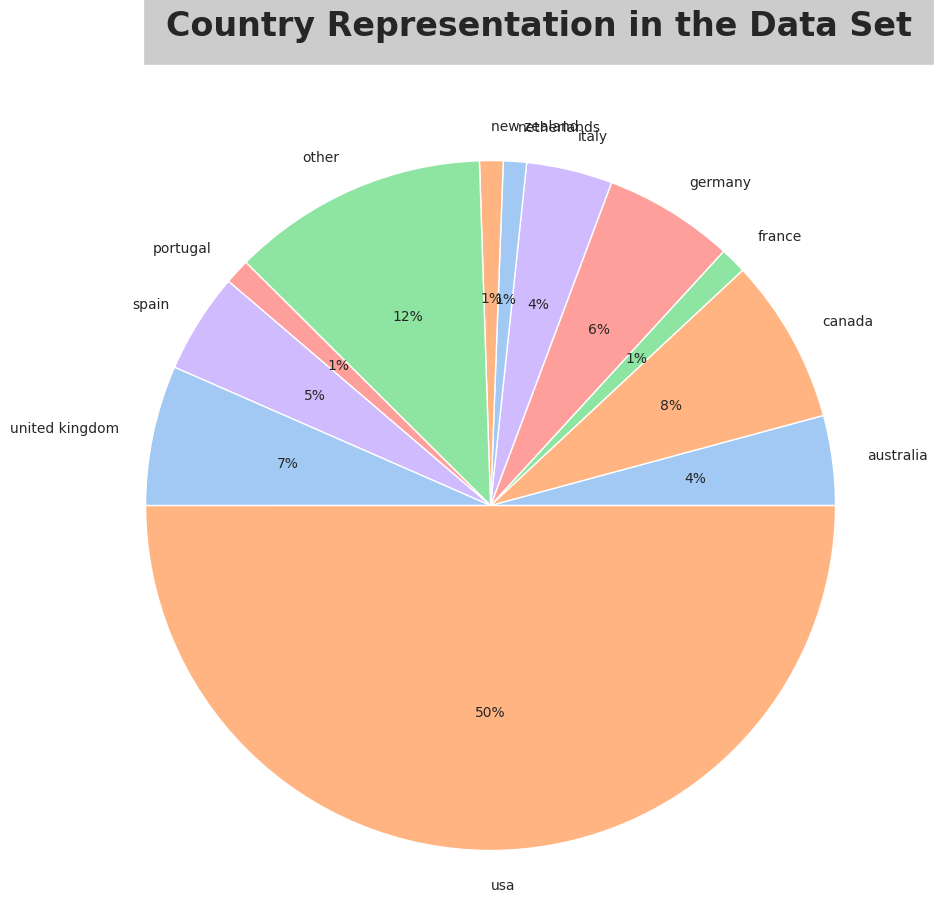

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(15,8))
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)


Most customers are from United states of America, followd by Canada, United Kingdom and Germany.

Countries with less than 1% customers are labelled as other

## **Age vs Rating Density**

In [ ]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = dataset.groupby('Book-Title')['ratings'].count().to_frame()
rating_mean = dataset.groupby('Book-Title')['ratings'].mean().to_frame()


In [ ]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'ratings':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'ratings':'Rating-Mean'}, inplace=True)
     

In [ ]:
dataset = pd.merge(dataset, rating_count, on='Book-Title', how='inner')
dataset = pd.merge(dataset, rating_mean, on='Book-Title', how='inner')
     

In [ ]:
# rounding off the rating mean feature to 2 decimal points
dataset['Rating-Mean'] = dataset['Rating-Mean'].round(2)

In [ ]:
# Calculating the mean vote across the whole df
C = dataset['Rating-Mean'].mean()
     

In [ ]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]

In [ ]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
df_merged_updated=dataset[dataset['ratings']!=0]

<Axes: >

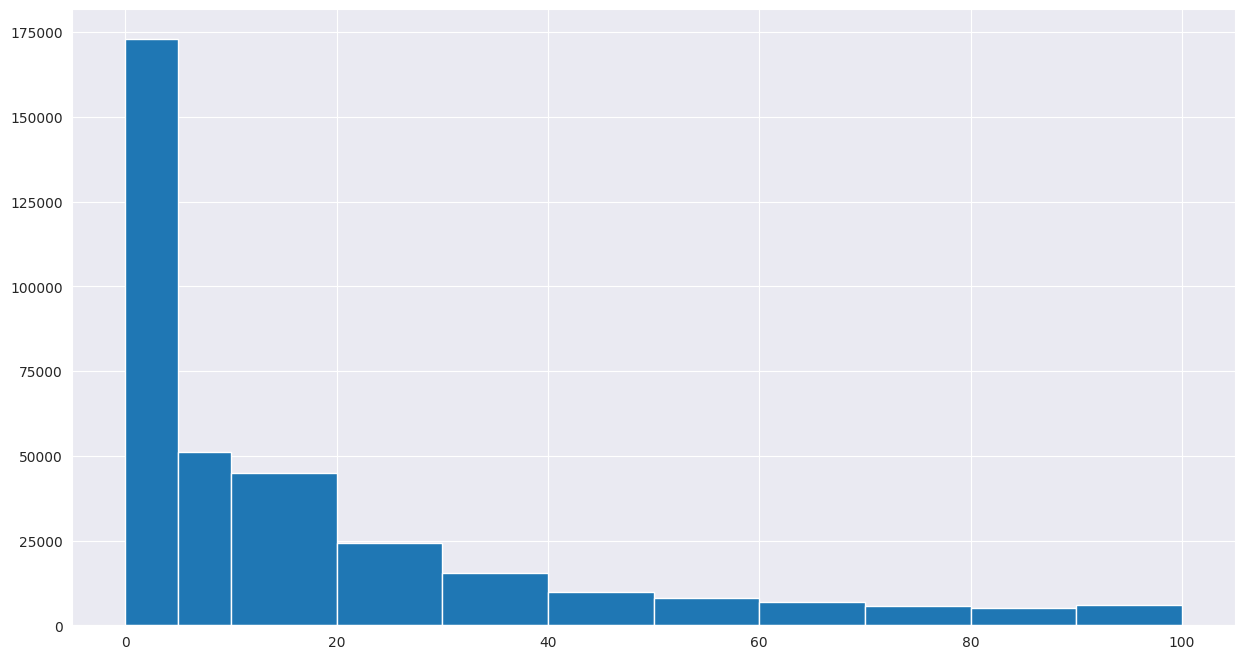

In [ ]:
# Visualizing the rating counts of the users. 
plt.figure(figsize=(15,8))
df_merged_updated['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])

<Axes: >

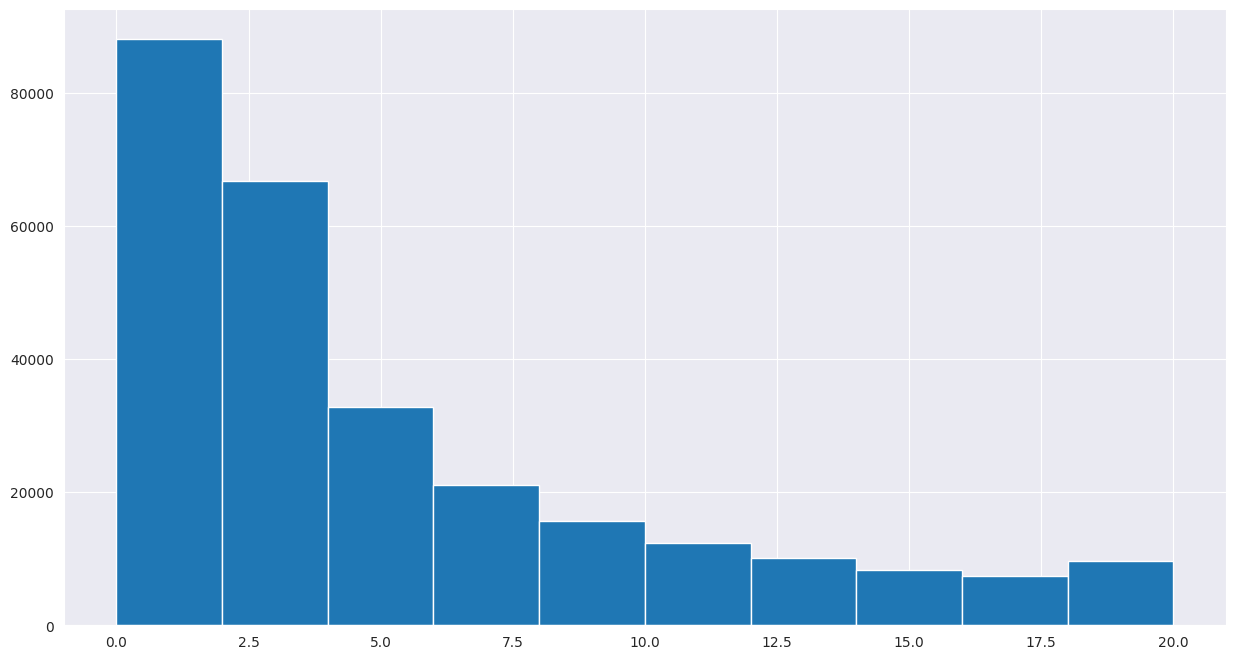

In [ ]:
# Visualizing the rating counts of the users in the range between 0 to 20.
plt.figure(figsize=(15,8)) 
df_merged_updated['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])

<Axes: ylabel='ratings'>

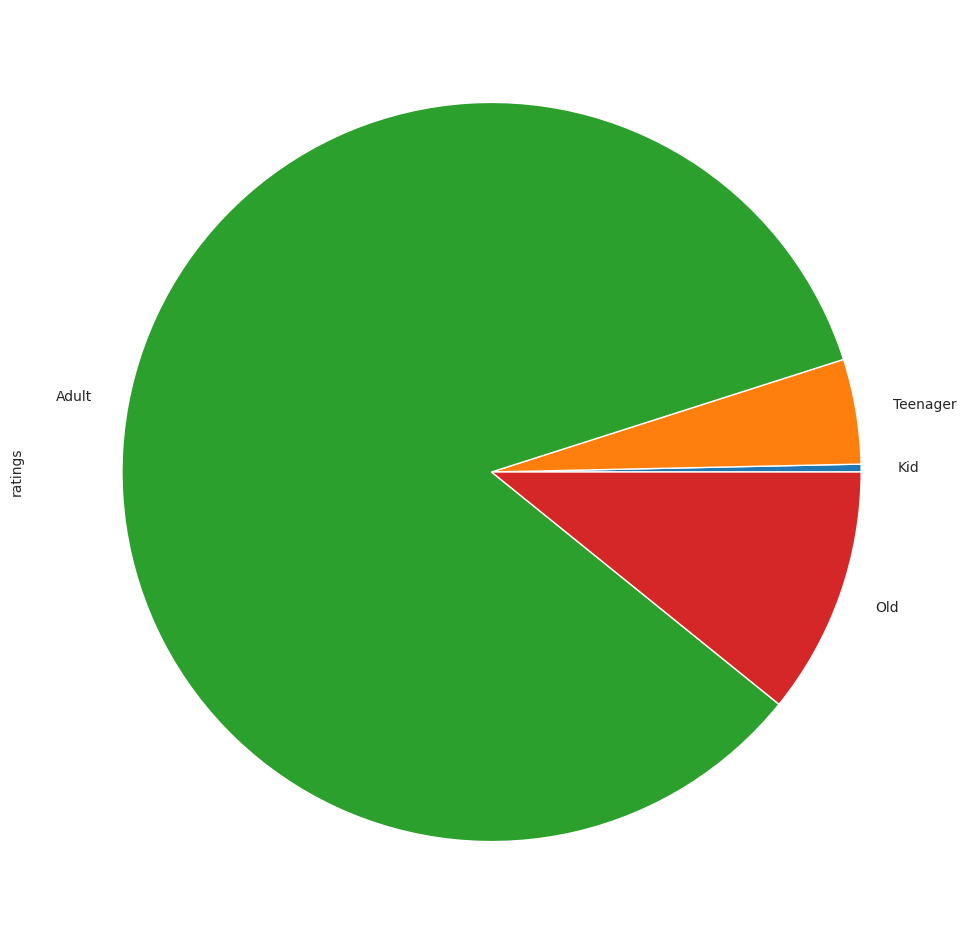

In [ ]:
# Age group that rated books the most
plt.figure(figsize=(20,12))
dataset.groupby('age_bins')['ratings'].count().plot(kind='pie')

Most customers are Adults (20-50yrs).

2nd most represented age group is for boomers (>50yrs).

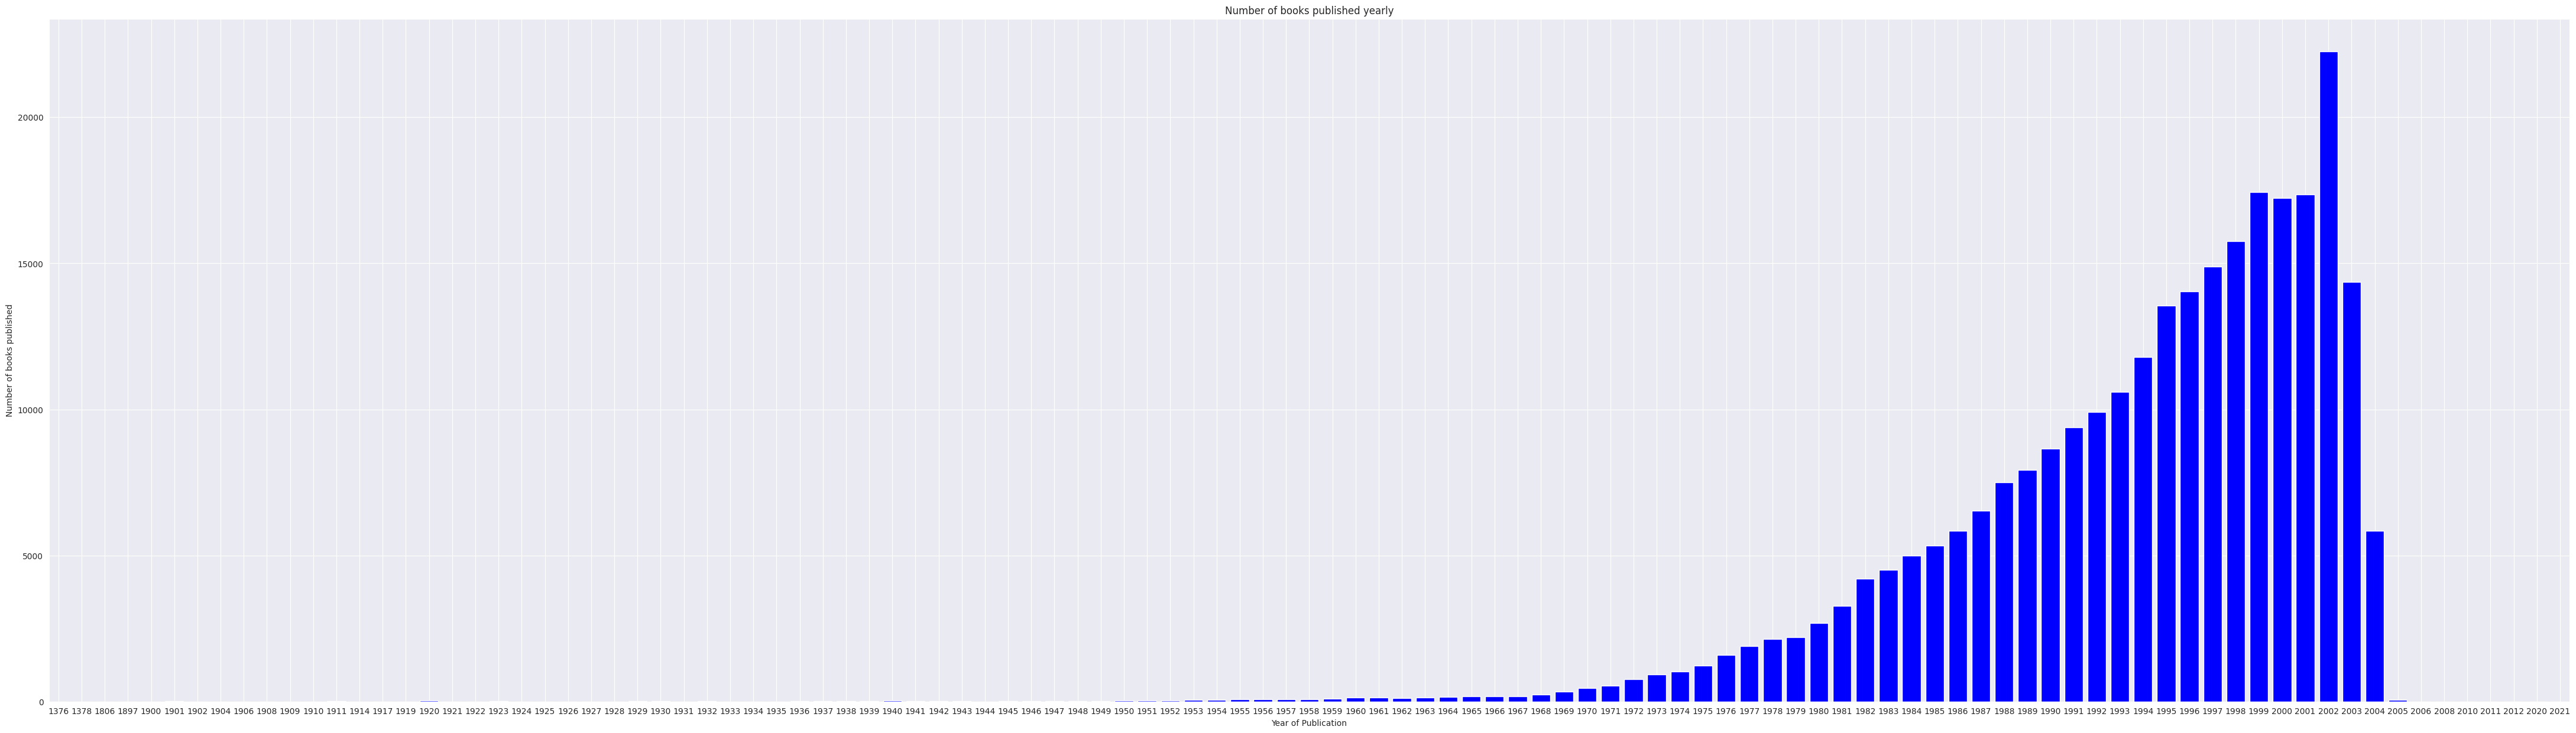

In [ ]:
# Lets plot bar graph for number of books published in different years
publications = {}
for year in books['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

# **Top 10 Publishers**

In [ ]:

# creating dataframe for top 10 publisher
order=pd.value_counts(books['Publisher']).iloc[:10].reset_index().rename(columns={'index':'Publisher','Publisher':'Count'}).sort_values(by='Count',ascending=True)


In [ ]:
# bar graph of top 10 publisher
fig = px.histogram(x= order.Count,y=order.Publisher,orientation=None , width=650, height=450,
              text_auto=True,color=order.Publisher
             )
fig.update_layout(
    title='Top 10 Publishers',
    xaxis_title="Count",
    yaxis_title="Publisher",
    template="plotly_dark",
    
)
fig.show()

From the graph above we can see the top 10 publishers and among them Harlequin publishers are the publishers of most books.

## **Top 10 Authors**

In [ ]:
# creating dataframe for top 10 Author
author=pd.value_counts(books['Book-Author']).iloc[:10].reset_index().rename(columns={'index':'Author','Book-Author':'Count'}).sort_values(by='Count',ascending=True)


In [ ]:
# bar graph of top 10 publisher
fig = px.histogram(x= author.Count,y=author.Author,orientation=None , width=650, height=450,
              text_auto=True,color=author.Author
             )
fig.update_layout(
    title='Top 10 Author',
    xaxis_title="Count",
    yaxis_title="Author",
    template="plotly_dark",
    
)
fig.show()

From the graph above we can see the top 10 Author. We can see that Agatha Christie has written most number of books that is 632.

## **Number of Books Publish Per Year**

In [ ]:
# lets plot bar graph for number of books published per year
year_book=books['Year-Of-Publication'].value_counts().reset_index().rename(columns={'index':'Year','Year-Of-Publication':'Count'}).sort_values(by='Year',ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(x=year_book.Year, y=year_book.Count,
                
                marker_color='crimson',
                name='expenses'))
fig.update_layout(
    
    width=1000, height=450,
    title='Number of book publish per year',
    xaxis_title="Year",
    yaxis_title="Number of Books",
    template="plotly+presentation+xgridoff",
    
)
fig.show()

From the above graph we can see that most of the books are published between 1980-2000.

# Top 10 Country having highest number of reader

In [ ]:
# top 10 Country 
country_count=users['Country'].value_counts()[:10].reset_index().rename(columns={'index':'country','Country':'count'}).sort_values(by='count',ascending=False)

In [ ]:
# top 10 country based on number of readers
fig = px.histogram(x= country_count['country'],y=country_count['count'],orientation=None , width=650, height=450,
              text_auto=True, color=country_count['country']
             )
fig.update_layout(
    title='Top 10 Country having highest number of reader',
    xaxis_title="country",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

As we can see from above plot most of the readers are from USA.

## **Top 10 States of USA having highest number of reader**

In [ ]:
# top 10 State of USA
state_usa=users.loc[users['Country']=='usa',['State']].value_counts()[:10].reset_index().rename(columns={0:'count'})


In [ ]:
# top 10  States of USA based on number of readers
fig = px.histogram(x= state_usa['State'],y=state_usa['count'],orientation=None , width=650, height=450,
              text_auto=True, color=state_usa['State']
             )
fig.update_layout(
    title='Top 10 States of USA having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

From above plot we can see that in USA california is having highest number of readers.

## **Top 10 cities of USA having highest number of reader**

In [ ]:
# Top 10 cities
cities=users.loc[(users['State']=='california'),['City']].value_counts()[:10].reset_index().rename(columns={0:'count'})
fig = px.histogram(x= cities['City'],y=cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=cities['City']
             )
fig.update_layout(
    title='Top 10 cities of USA having highest number of reader',
    xaxis_title="cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

In USA San diego is having highest number of reader followed by san francisco and Los Angeles.

# Top 10 State in the World having highest number of reader

In [ ]:
# top 10 States of world based on number of readers
top_10_states=users['State'].value_counts()[:10].reset_index().rename(columns={'index':'state','State':'count'})
fig = px.histogram(x= top_10_states['state'],y=top_10_states['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_states['state']
             )
fig.update_layout(
    title='Top 10 State in the World having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

Here we can see that California is stil having highest number of reader.

## **Top 10 Cities in the World having highest number of reader**

In [ ]:
# top 10 cities of world based on number of readers
top_10_cities=users['City'].value_counts()[:10].reset_index().rename(columns={'index':'city','City':'count'})
fig = px.histogram(x= top_10_cities['city'],y=top_10_cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_cities['city']
             )
fig.update_layout(
    title='Top 10 Cities in the World having highest number of reader',
    xaxis_title="Cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

Here we can see that unlike cities in the United States, we have the largest number of readers here in London, followed by Barcelona.

## **Percentage of book rating by all users**

In [ ]:
# lets define a function to calculate percentage of book rating
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

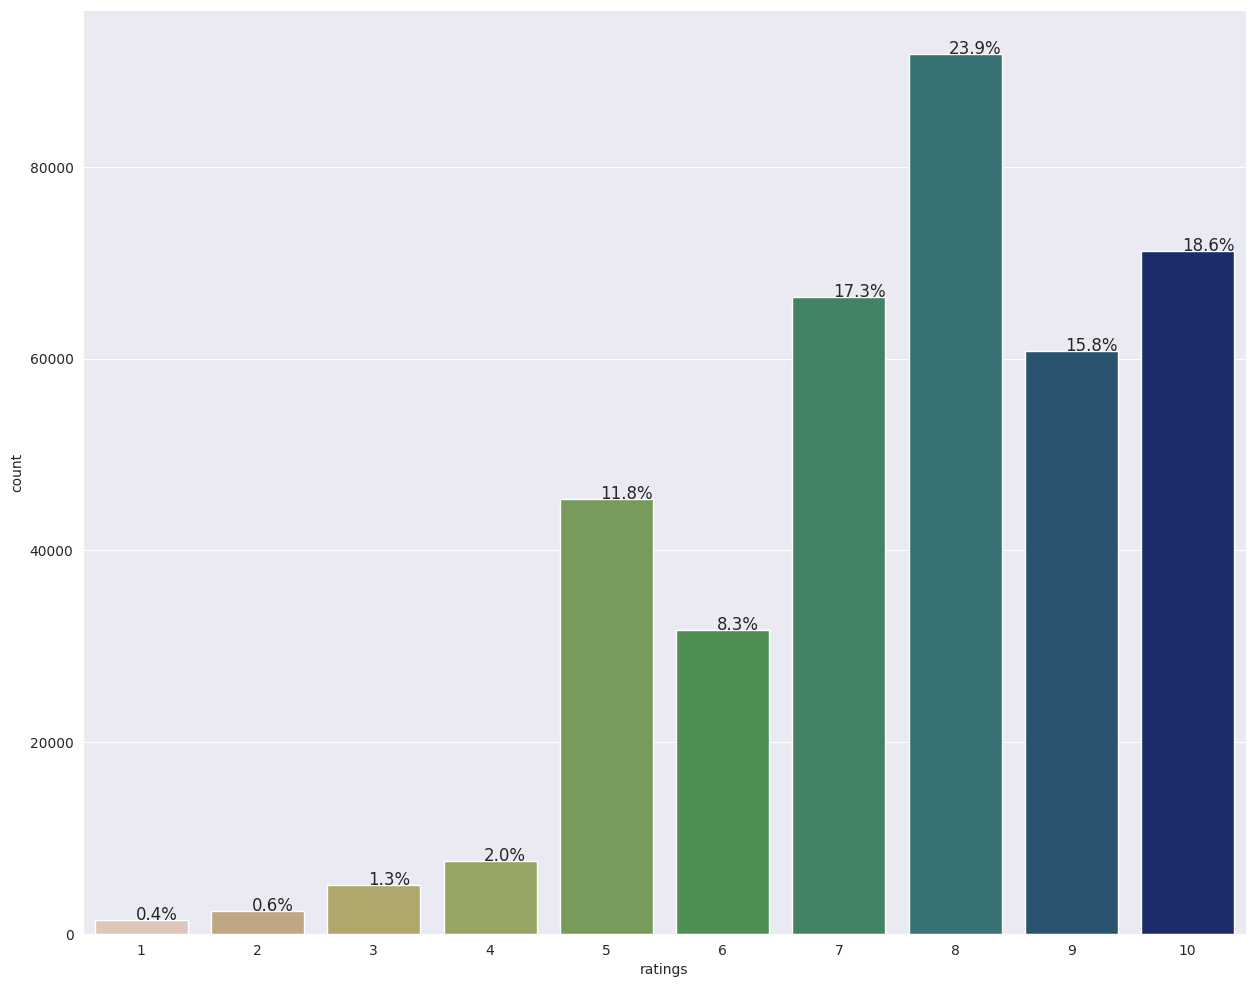

In [ ]:
# lets plot a bar graph for number of books of different ratings
plt.figure(figsize=(15,12))
ax=sns.countplot(x="ratings", data=dataset,palette='gist_earth_r')
without_hue(ax,dataset['ratings'])